# Introduction to Data Science Course Final Project

> by Kfir Goldfarb

<a href="https://github.com/kggold4"><img src="images/github.png" width="25px" height="25px" align="left"></a>
<a href="https://www.linkedin.com/in/kfir-goldfarb/"><img src="images/in.png"  width="25px" height="25px" align="left"></a>
<a href="mailto:kfir.goldfarb@msmail.ariel.ac.il"><img src="images/email.png" width="25px" height="25px" align="left"></a>
<a href="https://www.youtube.com/channel/UCypEWlruyG_I5A48GqB5c6g"><img src="images/youtube.png" width="25px" height="25px" align="left"></a>

<br>

# Jupyter Notebook Number 3
<i>Machine Learning</i>
<br>

<img src="images/ml2images.jpg" width="90%" height="auto" align="left">

# <i>Part 1 - Classification:</i>

In [1]:
# libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

the dataset I'm using for the classification problem is from:
https://www.kaggle.com/spscientist/students-performance-in-exams

### this dataset deals with different grades of students according to 3 topics:

1. math score
2. reading score
3. writing score

### this information we have about a student is:

1. gender
2. race/ethnicity
3. parental level of education
4. lunch
5. test preparation course

In [2]:
# import data:
students = pd.read_csv('data/StudentsPerformance.csv')

## <i>Learning about the data:</i>

In [3]:
# first five students:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## <i>Dataset Features:</i>
1. gender - the sex of the student (male or female)
2. race/ethnicity - the race/ethnicity of the student (groups) - (details on the groups below)
3. parental level of education - the parental level of education of the student (the parents of his) - (details on the groups below)
4. lunch - if the student ate a lunch before the exams
5. test preparation course - if the student take a test preparation course
6. math score
7. reading score
8. writing score

In [4]:
# checking if the data contains null data objects:
# and see data types
students.info()

# as we can see the data is clean of null data objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# another check for finding null objects
students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
# seeing the students scores widely
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# adding the average score feature for each student with the average of math, reading and writing score
# the assign ,method is to change every average value in average target for each row
students = students.assign(average= lambda x: ((x['math score'] + x['reading score'] + x['writing score']) / 3.0))
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


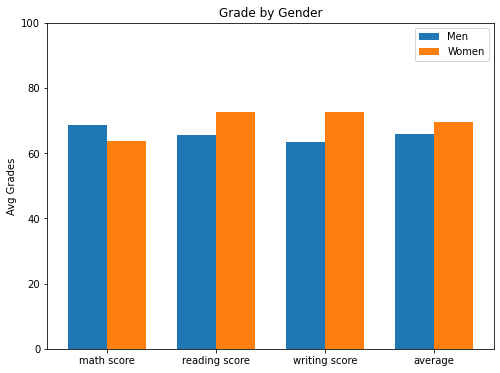

In [8]:
# ploting a bar plot with grades by genders (means):

# male will get a numpy array with the means of scores by male gender
male = np.array(students.groupby('gender').mean())[1]

# male will get a numpy array with the means of scores by female gender
female = np.array(students.groupby('gender').mean())[0]

# change the figure size of the bar plot
plt.figure(figsize=(8,6))

width = 0.36
ind = np.arange(4)

# ploting man scores means
plt.bar(ind, male, width, label='Men')

# ploting women scores means
plt.bar(ind + width, female, width, label='Women')

# limit the axis from 0 to 100
plt.ylim(0,100)

# y label
plt.ylabel('Avg Grades')

# plot title
plt.title('Grade by Gender')

# x ticks
plt.xticks(ind + width / 2 ,('math score','reading score','writing score','average'))

plt.legend()

plt.show()

In [9]:
# define a function that plot with a pie
def print_pie(values, lables):
    values = list(values)
    
    # get a objcet pie from matplotlib and a figure
    fig1, ax1 = plt.subplots()

    # set the size of the figure
    fig1.set_figheight(7)
    fig1.set_figwidth(7)

    # plot the pie
    # x - the parental level of education data
    # autopct - show the percentages at only one decimal point
    # shadow - show the shadow of the pie
    # startangle - rotate the pie in 90 degrees
    ax1.pie(values, labels=lables, autopct='%1.1f%%', shadow=True, startangle=90)

    # equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')

    plt.show()

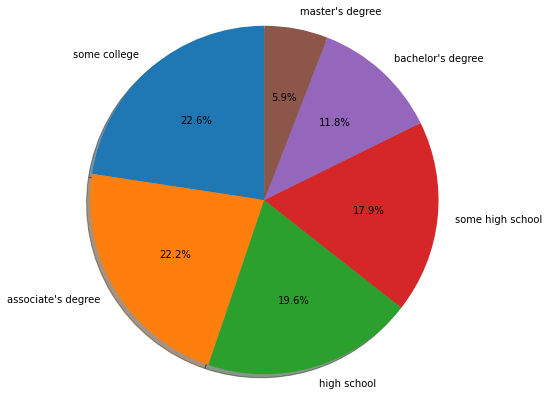

In [10]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = students['parental level of education'].value_counts()

# write all the type of values in parental level of education feature
parents_education = ['some college', 'associate\'s degree', 'high school',
                     'some high school', 'bachelor\'s degree', 'master\'s degree']

print_pie(values, parents_education)

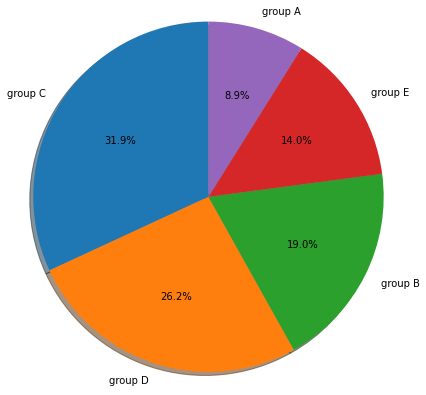

In [11]:
# showing differents in parental level of education of the students in the dataset in a pie of matplotlib

# get all the counts of the values in parental level of education feature
values = list(students['race/ethnicity'].value_counts())

# write all the type of values in parental level of education feature
ethnicity = ['group C', 'group D', 'group B', 'group E', 'group A']

print_pie(values, ethnicity)

# The goal of my machine learning model:

After the data preparation, I want to take for each student the three scores: math score, reading score and writing score and merge them to one feature by the mean of the three, this feature will called average.
After that process we have one feature called average and have a number value between 0 and 100, i want to classified the scores to two main classes:

1. 1, if x >= 60 ('pass')
2. 0, else ('fail')

Now, the goal of the model by a given a data of a student is to predict what is the status of the student, if the studet is fail ('0') or pass ('1') in the tests score.

## <i>Preparing the data:</i>

In [12]:
# for preparing all the binary values of text (string objects) in the data set:
# I used the LabelEncoder from sklearn.preprocessing library,
# that helping me to convert all the binary values of texetual data to a numbers
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

# preparing the 'gender' feature to binary numbers (0 = female, 1 = male)
students['gender'] = lc.fit_transform(students['gender'])

# preparing the 'lunch' feature to binary numbers (0 = free/reduced	, 1 = standard)
students['lunch'] = lc.fit_transform(students['lunch'])

# preparing the 'lunch' feature to binary numbers (0 = completed, 1 = none)
students['test preparation course'] = lc.fit_transform(students['test preparation course'])

# showing results
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,group B,bachelor's degree,1,1,72,72,74,72.666667
1,0,group C,some college,1,0,69,90,88,82.333333
2,0,group B,master's degree,1,1,90,95,93,92.666667
3,1,group A,associate's degree,0,1,47,57,44,49.333333
4,1,group C,some college,1,1,76,78,75,76.333333


In [13]:
# create dummies varables for 'race/ethnicity' feature:
students = pd.get_dummies(students, columns=['race/ethnicity'])
students.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,bachelor's degree,1,1,72,72,74,72.666667,0,1,0,0,0
1,0,some college,1,0,69,90,88,82.333333,0,0,1,0,0
2,0,master's degree,1,1,90,95,93,92.666667,0,1,0,0,0
3,1,associate's degree,0,1,47,57,44,49.333333,1,0,0,0,0
4,1,some college,1,1,76,78,75,76.333333,0,0,1,0,0


In [14]:
# create dummies varables for 'parental level of education' feature:
students = pd.get_dummies(students, columns=['parental level of education'])
students.head()

,gender,lunch,test preparation course,math score,reading score,writing score,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,72.666667,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,69,90,88,82.333333,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,90,95,93,92.666667,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,47,57,44,49.333333,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,76,78,75,76.333333,0,0,1,0,0,0,0,0,0,1,0


In [15]:
# droping the math score, reading score and writing score features
students.drop('math score', inplace=True, axis = 1)
students.drop('reading score', inplace=True, axis = 1)
students.drop('writing score', inplace=True, axis = 1)
students.head()

,gender,lunch,test preparation course,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72.666667,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,82.333333,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,92.666667,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,49.333333,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,76.333333,0,0,1,0,0,0,0,0,0,1,0


In [16]:
# classified the average score feature as: if x >= 60 - 1 ('pass'), else - 0 ('fail')

students['average'] = students['average'].apply(lambda x: 1 if x >= 60 else 0)
students.head(10)

,gender,lunch,test preparation course,average,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0
5,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
6,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0
7,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
9,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [17]:
# create dummies varables for 'parental level of education' feature:
# students = pd.get_dummies(students, columns=['average'])
# students.head()

### Separate data to training and testing sets

In [18]:
feature_cols = ['gender','lunch','test preparation course','race/ethnicity_group A','race/ethnicity_group B',
                'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E',
                'parental level of education_associate\'s degree', 'parental level of education_bachelor\'s degree',
                'parental level of education_high school', 'parental level of education_master\'s degree',
                'parental level of education_some college', 'parental level of education_some high school']
X = students[feature_cols]
y = students['average']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

### Using KNeighborsClassifier model
#### Accuracy:

In [19]:
# function that print the accuracy
def print_accuracy(clf, X_train, X_test, y_train, y_test):
    # fit the train data to the model
    clf.fit(X_train, y_train)

    # get the pridictions of X_test
    pridictions = clf.predict(X_test)

    # get the accuracy of the model
    accuracy = clf.score(X_test, y_test)

    # print the accuracy
    print('accuracy of the model is: {} %'.format("%.2f" % (accuracy * 100)))

In [20]:
# get the classifier (found that 5 neighbors is the best predicter)
nclf = KNeighborsClassifier(n_neighbors=5)

# print accuracy
print_accuracy(nclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 70.40 %


#### Confusion matrix:

In [21]:
# function of ploting the confusion_matrix
def my_plot_confusion_matrix(clf, X_test, y_test):

    # get the confusion_matrix for ploting
    matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

    # main title
    matrix.ax_.set_title('Confusion matrix')

    # x label
    plt.xlabel('Predicted Label')

    # y label
    plt.ylabel('True label')

    # size of the figure
    plt.gcf().set_size_inches(10, 6)

    # show plot
    plt.show()

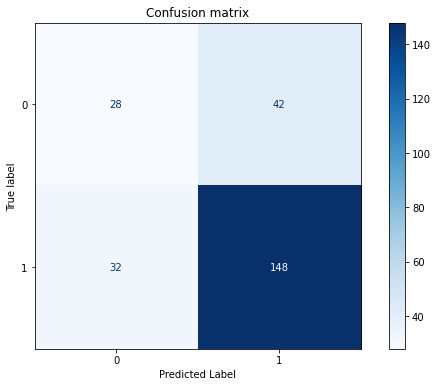

In [22]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(nclf, X_test, y_test)

### Using DecisionTreeClassifier model
#### Accuracy:

In [23]:
# get the classifier 
dclf = DecisionTreeClassifier()

# print accuracy
print_accuracy(dclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 71.60 %


#### Confusion matrix:

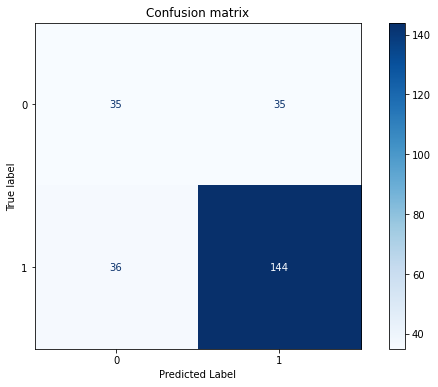

In [24]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(dclf, X_test, y_test)

### Using LogisticRegression classifier model
#### Accuracy:

In [25]:
# get the classifier 
lclf = LogisticRegression()

# print accuracy
print_accuracy(lclf, X_train, X_test, y_train, y_test)

accuracy of the model is: 77.60 %


#### Confusion matrix:

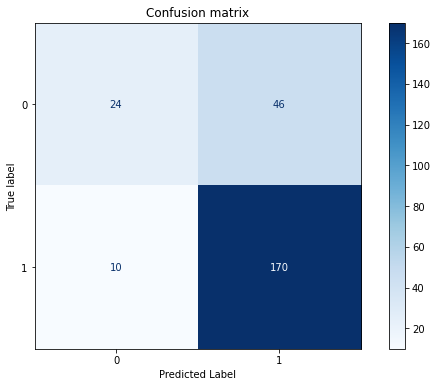

In [26]:
# plot the confusion matrix using the my_plot_confusion_matrix function
my_plot_confusion_matrix(lclf, X_test, y_test)

## ROCcurve:
### **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

### **Prediction probabilities**

In [48]:
# Random (chance) Prediction in the ROC plot (the middle straight line)
r_probs = [0 for _ in range(len(y_test))]

# probabilities for KNeighborsClassifier
nclf_probs = nclf.predict_proba(X_test)

# probabilities for DecisionTreeClassifier
dclf_probs = dclf.predict_proba(X_test)

# probabilities for LogisticRegression
lclf_probs = lclf.predict_proba(X_test)

# for each probabilities for a classifier data change from nested list to one list
nclf_probs = nclf_probs[:, 1]
dclf_probs = dclf_probs[:, 1]
lclf_probs = lclf_probs[:, 1]

# ROC is the receiver operating characteristic AUROC is the area under the ROC curve
# get accuracy for each classifier from the test data and the probabilities data
r_auc = roc_auc_score(y_test, r_probs)
nclf_auc = roc_auc_score(y_test, nclf_probs)
dclf_auc = roc_auc_score(y_test, dclf_probs)
lclf_auc = roc_auc_score(y_test, lclf_probs)

# print to see the AUROC for each classifier
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('KNeighborsClassifier: AUROC = %.3f' % (nclf_auc))
print('DecisionTreeClassifier: AUROC = %.3f' % (dclf_auc))
print('LogisticRegression: AUROC = %.3f' % (lclf_auc))

Random (chance) Prediction: AUROC = 0.500
KNeighborsClassifier: AUROC = 0.644
DecisionTreeClassifier: AUROC = 0.691
LogisticRegression: AUROC = 0.775


In [40]:
# Calculate ROC curve
# tpr = TP/(TP+FN) (Sensitivity)
# fpr = FP/(TN+FP) (1 - Specificity)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nclf_fpr, nclf_tpr, _ = roc_curve(y_test, nclf_probs)
dclf_fpr, dclf_tpr, _ = roc_curve(y_test, dclf_probs)
lclf_fpr, lclf_tpr, _ = roc_curve(y_test, lclf_probs)

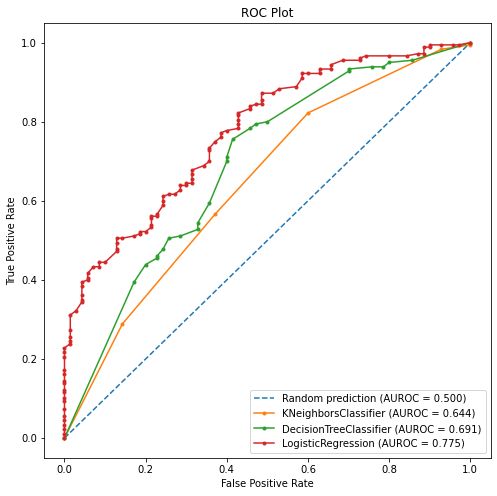

In [57]:
# set the size of the figure
plt.figure(figsize=(8,8))

# for each classifier plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nclf_fpr, nclf_tpr, marker='.', label='KNeighborsClassifier (AUROC = %0.3f)' % nclf_auc)
plt.plot(dclf_fpr, dclf_tpr, marker='.', label='DecisionTreeClassifier (AUROC = %0.3f)' % dclf_auc)
plt.plot(lclf_fpr, lclf_tpr, marker='.', label='LogisticRegression (AUROC = %0.3f)' % lclf_auc)

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

# Show plot
plt.show()

### <i>Classification Conclusion:</i> from the three classifiers algorithms - the logisitic regression have the most accuracy

# <i>Part 2 - regression:</i>